In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [103]:
df=pd.read_excel('Admission.xlsx')

In [104]:
df.head()

,SlNo,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Experience_Yrs,Entrance_Test,Percentile_ET,Percent_MBA,Specialization_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Placement,Salary
0,1,M,62.00,Others,88.00,Others,Commerce,52.00,Science,0,MAT,55.0,58.80,Marketing & HR,50,65,74,Placed,270000
1,2,M,76.33,ICSE,75.33,Others,Science,75.48,Computer Applications,1,MAT,86.5,66.28,Marketing & Finance,69,70,75,Placed,200000
2,3,M,72.00,Others,78.00,Others,Commerce,66.63,Engineering,0,NaN,0.0,52.91,Marketing & Finance,50,61,59,Placed,240000
3,4,M,60.00,CBSE,63.00,CBSE,Arts,58.00,Management,0,MAT,75.0,57.80,Marketing & Finance,54,66,62,Placed,250000
4,5,M,61.00,CBSE,55.00,ISC,Science,54.00,Engineering,1,MAT,66.0,59.43,Marketing & HR,52,65,67,Placed,180000


In [105]:
df.drop('SlNo',axis=1,inplace=True)

In [106]:
df.shape

(391, 18)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               391 non-null    object 
 1   Percent_SSC          391 non-null    float64
 2   Board_SSC            391 non-null    object 
 3   Percent_HSC          391 non-null    float64
 4   Board_HSC            391 non-null    object 
 5   Stream_HSC           391 non-null    object 
 6   Percent_Degree       391 non-null    float64
 7   Course_Degree        391 non-null    object 
 8   Experience_Yrs       391 non-null    int64  
 9   Entrance_Test        324 non-null    object 
 10  Percentile_ET        391 non-null    float64
 11  Percent_MBA          391 non-null    float64
 12  Specialization_MBA   391 non-null    object 
 13  Marks_Communication  391 non-null    int64  
 14  Marks_Projectwork    391 non-null    int64  
 15  Marks_BOCA           391 non-null    int

In [108]:
df.describe(include='number')

,Percent_SSC,Percent_HSC,Percent_Degree,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Salary
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,64.652353,63.795294,62.983606,0.478261,54.934962,61.667698,60.539642,68.363171,64.378517,219078.260870
std,10.960426,11.417726,8.916152,0.667112,31.168264,5.854399,8.824084,7.145095,9.582834,138311.647036
min,37.000000,40.000000,35.000000,0.000000,0.000000,50.830000,50.000000,50.000000,50.000000,0.000000
25%,56.000000,54.000000,57.525000,0.000000,41.190000,57.195000,53.000000,64.000000,57.000000,172800.000000
50%,64.500000,63.000000,63.000000,0.000000,62.000000,61.010000,58.000000,69.000000,63.000000,240000.000000
75%,74.000000,72.000000,69.000000,1.000000,78.000000,66.020000,67.000000,74.000000,72.500000,300000.000000
max,87.200000,94.700000,89.000000,3.000000,98.690000,77.890000,88.000000,87.000000,96.000000,940000.000000


In [109]:
df.describe(include='O')

,Gender,Board_SSC,Board_HSC,Stream_HSC,Course_Degree,Entrance_Test,Specialization_MBA,Placement
count,391,391,391,391,391,324,391,391
unique,2,3,3,3,7,8,3,2
top,M,Others,Others,Commerce,Management,MAT,Marketing & Finance,Placed
freq,264,201,247,222,163,265,222,312


In [110]:
df.isnull().sum()

Gender                  0
Percent_SSC             0
Board_SSC               0
Percent_HSC             0
Board_HSC               0
Stream_HSC              0
Percent_Degree          0
Course_Degree           0
Experience_Yrs          0
Entrance_Test          67
Percentile_ET           0
Percent_MBA             0
Specialization_MBA      0
Marks_Communication     0
Marks_Projectwork       0
Marks_BOCA              0
Placement               0
Salary                  0
dtype: int64

In [111]:
df['Entrance_Test'].fillna(value='No test',inplace=True)
# In this we are replacing the Null Values with No test beacuse in the Entrance Test column there is possibility that a student get admission by Management seat.

In [112]:
df.isnull().sum()

Gender                 0
Percent_SSC            0
Board_SSC              0
Percent_HSC            0
Board_HSC              0
Stream_HSC             0
Percent_Degree         0
Course_Degree          0
Experience_Yrs         0
Entrance_Test          0
Percentile_ET          0
Percent_MBA            0
Specialization_MBA     0
Marks_Communication    0
Marks_Projectwork      0
Marks_BOCA             0
Placement              0
Salary                 0
dtype: int64

In [113]:
Num_cols= df.select_dtypes(include='number')
Num_cols.head()

,Percent_SSC,Percent_HSC,Percent_Degree,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Salary
0,62.00,88.00,52.00,0,55.0,58.80,50,65,74,270000
1,76.33,75.33,75.48,1,86.5,66.28,69,70,75,200000
2,72.00,78.00,66.63,0,0.0,52.91,50,61,59,240000
3,60.00,63.00,58.00,0,75.0,57.80,54,66,62,250000
4,61.00,55.00,54.00,1,66.0,59.43,52,65,67,180000


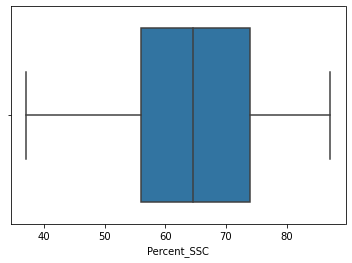

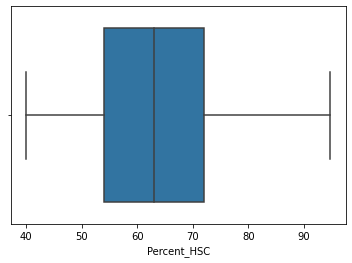

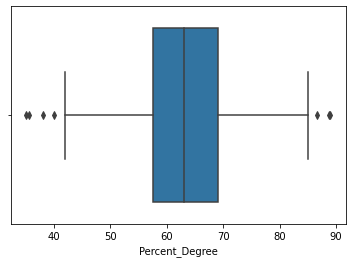

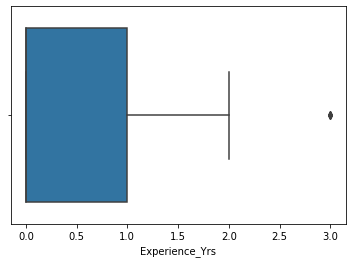

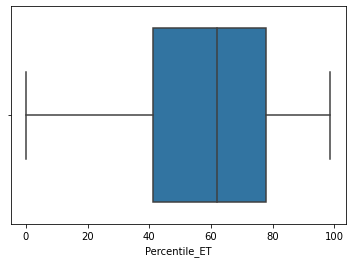

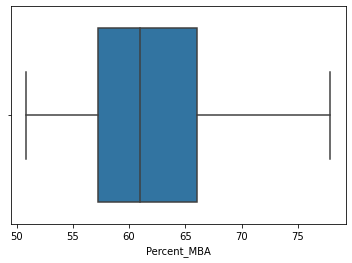

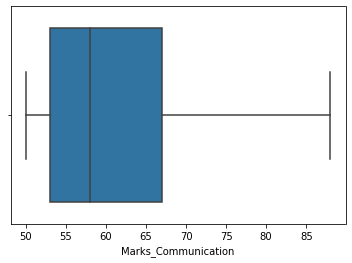

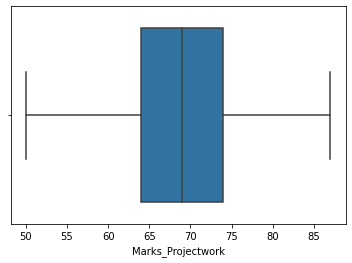

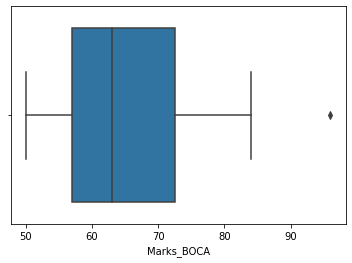

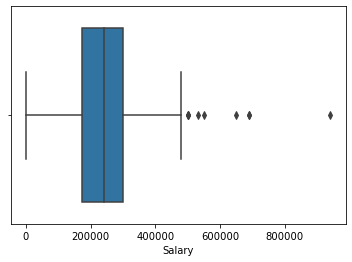

In [114]:
for i in Num_cols.columns:
    sns.boxplot(Num_cols[i])
    plt.show()

In [115]:
# for Percent_Degree , Experience_Years , Marks_BOCA , Salary Columns has Outliers

In [116]:
Outliers=df[['Percent_Degree','Experience_Yrs','Marks_BOCA']]
Outliers.head()

,Percent_Degree,Experience_Yrs,Marks_BOCA
0,52.00,0,74
1,75.48,1,75
2,66.63,0,59
3,58.00,0,62
4,54.00,1,67


In [117]:
#IQR

In [118]:
iqr=[]
col=0
for i in Outliers.columns:
    q1=Outliers[i].quantile(.25)
    q3=Outliers[i].quantile(.75)
    iqr= q3-q1
    col+=Outliers[i]
    print(iqr)

11.474999999999994
1.0
15.5


In [119]:
q1=Outliers['Percent_Degree'].quantile(.25)
q3=Outliers['Percent_Degree'].quantile(.75)
iqr= q3-q1
ul=q3+1.5*iqr
ll=q1-1.5*iqr
print('ll is',ll,'\n''ul is ',ul)
print('No.of Outliers in Percent Degree columns is',len(df[(df['Percent_Degree']<ll) | (df['Percent_Degree']>ul)]))
df[(df['Percent_Degree']<ll) | (df['Percent_Degree']>ul)]

ll is 40.312500000000014 
ul is  86.21249999999999
No.of Outliers in Percent Degree columns is 7


,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Experience_Yrs,Entrance_Test,Percentile_ET,Percent_MBA,Specialization_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Placement,Salary
17,M,37.33,Others,47.4,Others,Commerce,35.5,Commerce,0,No test,0.00,54.78,Marketing & HR,50,57,50,Placed,240000
52,F,68.00,CBSE,69.0,CBSE,Commerce,40.0,Commerce,0,MAT,74.00,62.80,Marketing & HR,55,59,82,Placed,180000
144,F,52.00,Others,59.0,Others,Arts,38.0,Arts,1,MAT,40.00,62.01,Marketing & HR,52,69,64,Placed,276000
185,F,77.00,ICSE,79.0,ISC,Commerce,86.7,Management,1,K-MAT,95.00,67.83,Marketing & Finance,75,79,75,Placed,450000
317,F,37.30,Others,44.4,Others,Commerce,35.0,Commerce,0,No test,0.00,61.66,Marketing & Finance,62,66,69,Not Placed,0
340,F,80.96,Others,45.0,Others,Science,89.0,Computer Applications,0,MAT,59.32,69.71,Marketing & HR,76,77,66,Placed,260000
379,F,85.80,CBSE,85.0,CBSE,Science,88.8,Management,0,MAT,96.16,77.30,Marketing & HR,88,80,63,Placed,300000


In [120]:
q1=Outliers['Experience_Yrs'].quantile(.25)
q3=Outliers['Experience_Yrs'].quantile(.75)
iqr= q3-q1
ul=q3+1.5*iqr
ll=q1-1.5*iqr
print('ll is',ll,'\n''ul is ',ul)
print('No.of Outliers in Percent Degree columns is',len(df[(df['Experience_Yrs']<ll) | (df['Experience_Yrs']>ul)]))
df[(df['Experience_Yrs']<ll) | (df['Experience_Yrs']>ul)]

ll is -1.5 
ul is  2.5
No.of Outliers in Percent Degree columns is 4


,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Experience_Yrs,Entrance_Test,Percentile_ET,Percent_MBA,Specialization_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Placement,Salary
204,F,59.00,ICSE,62.00,Others,Science,65.6,Engineering,3,MAT,55.67,71.49,Marketing & HR,80,77,58,Placed,250000
244,M,59.00,ICSE,57.00,ISC,Commerce,55.0,Commerce,3,K-MAT,65.00,59.54,Marketing & Finance,55,76,62,Placed,530000
256,F,78.94,Others,77.83,Others,Commerce,77.0,Commerce,3,No test,0.00,68.55,Marketing & HR,69,76,84,Placed,250000
371,M,62.00,Others,62.00,Others,Commerce,71.0,Commerce,3,MAT,59.00,69.72,Marketing & Finance,63,71,61,Placed,295000


In [121]:
q1=Outliers['Marks_BOCA'].quantile(.25)
q3=Outliers['Marks_BOCA'].quantile(.75)
iqr= q3-q1
ul=q3+1.5*iqr
ll=q1-1.5*iqr
print('ll is',ll,'\n''ul is ',ul)
print('No.of Outliers in Percent Degree columns is',len(df[(df['Marks_BOCA']<ll) | (df['Marks_BOCA']>ul)]))
df[(df['Marks_BOCA']<ll) | (df['Marks_BOCA']>ul)]

ll is 33.75 
ul is  95.75
No.of Outliers in Percent Degree columns is 1


,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Experience_Yrs,Entrance_Test,Percentile_ET,Percent_MBA,Specialization_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Placement,Salary
171,F,73.0,CBSE,65.0,CBSE,Science,74.0,Management,1,MAT,66.0,64.44,Marketing & Finance,62,77,96,Placed,300000


In [122]:
# As there arent many Outliers in columns I am dropping those

In [123]:
df['Percent_Degree']=df[(df['Percent_Degree']>ll) & (df['Percent_Degree']<ul)]
df['Marks_BOCA']=df[(df['Marks_BOCA']>ll) & (df['Marks_BOCA']<ul)]

Encoding Coding

In [124]:
Cat_col=df.select_dtypes(include='object').columns
Cat_col

Index(['Gender', 'Board_SSC', 'Board_HSC', 'Stream_HSC', 'Percent_Degree',
       'Course_Degree', 'Entrance_Test', 'Specialization_MBA', 'Marks_BOCA',
       'Placement'],
      dtype='object')

In [125]:
cat_col=pd.get_dummies(df[['Gender', 'Board_SSC', 'Board_HSC', 'Stream_HSC', 'Percent_Degree',
       'Course_Degree', 'Entrance_Test', 'Specialization_MBA', 'Marks_BOCA',
       'Placement']],drop_first=True)

In [126]:
cat_col.head()

,Gender_M,Board_SSC_ICSE,Board_SSC_Others,Board_HSC_ISC,Board_HSC_Others,Stream_HSC_Commerce,Stream_HSC_Science,Percent_Degree_M,Course_Degree_Commerce,Course_Degree_Computer Applications,...,Entrance_Test_GCET,Entrance_Test_K-MAT,Entrance_Test_MAT,Entrance_Test_No test,Entrance_Test_PGCET,Entrance_Test_XAT,Specialization_MBA_Marketing & HR,Specialization_MBA_Marketing & IB,Marks_BOCA_M,Placement_Placed
0,1,0,1,0,1,1,0,1,0,0,...,0,0,1,0,0,0,1,0,1,1
1,1,1,0,0,1,0,1,1,0,1,...,0,0,1,0,0,0,0,0,1,1
2,1,0,1,0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,1
3,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,1
4,1,0,0,1,0,0,1,1,0,0,...,0,0,1,0,0,0,1,0,1,1


In [212]:
num_col=df[['Percent_SSC', 'Percent_HSC',
       'Experience_Yrs', 'Percentile_ET', 'Percent_MBA', 'Marks_Communication',
       'Marks_Projectwork', 'Salary']]

In [213]:
num_col.head()

,Percent_SSC,Percent_HSC,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Salary
0,62.00,88.00,0,55.0,58.80,50,65,270000
1,76.33,75.33,1,86.5,66.28,69,70,200000
2,72.00,78.00,0,0.0,52.91,50,61,240000
3,60.00,63.00,0,75.0,57.80,54,66,250000
4,61.00,55.00,1,66.0,59.43,52,65,180000


In [214]:
final_data=pd.concat([num_col,cat_col],axis=1)

In [215]:
final_data.head()

,Percent_SSC,Percent_HSC,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Salary,Gender_M,Board_SSC_ICSE,...,Entrance_Test_GCET,Entrance_Test_K-MAT,Entrance_Test_MAT,Entrance_Test_No test,Entrance_Test_PGCET,Entrance_Test_XAT,Specialization_MBA_Marketing & HR,Specialization_MBA_Marketing & IB,Marks_BOCA_M,Placement_Placed
0,62.00,88.00,0,55.0,58.80,50,65,270000,1,0,...,0,0,1,0,0,0,1,0,1,1
1,76.33,75.33,1,86.5,66.28,69,70,200000,1,1,...,0,0,1,0,0,0,0,0,1,1
2,72.00,78.00,0,0.0,52.91,50,61,240000,1,0,...,0,0,0,1,0,0,0,0,1,1
3,60.00,63.00,0,75.0,57.80,54,66,250000,1,0,...,0,0,1,0,0,0,0,0,1,1
4,61.00,55.00,1,66.0,59.43,52,65,180000,1,0,...,0,0,1,0,0,0,1,0,1,1


Model Building

In [216]:
X=final_data.drop('Salary',axis=1)
y=final_data['Salary']

In [217]:
X.shape

(391, 33)

In [218]:
y.shape

(391,)

In [219]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [153]:
x_train.shape

(273, 33)

In [154]:
x_test.shape

(118, 33)

In [155]:
y_train.shape

(273,)

In [156]:
y_test.shape

(118,)

In [157]:
Lr= LinearRegression()

In [158]:
Lr.fit(x_train,y_train)

LinearRegression()

In [159]:
y_pred=Lr.predict(x_test)

In [162]:
y_pred

array([319163.06150698, 292759.74889   , 251490.85389661, 318026.3142703 ,
       -57748.22473309, 206362.38910867, 309877.35232241, 311485.31888085,
       256521.99874507,  -2086.42126039, 234770.02190007, 217236.39679679,
       186846.58536933, 259028.35924849, 242294.0729162 , 307895.83596669,
       337633.52626774, 277264.92776403, 288070.70821675, 286507.75274245,
       216014.34517024, 272225.44766381, 282373.5778825 , 270031.09517017,
        27958.67492517, 301513.07825433,   1126.08879134, 266698.42120509,
       224033.26145178, 276984.56936314, 300910.52651989, 291972.43057911,
       297379.60973896, 294462.46624313, 237877.34396525,  15582.78164058,
       216788.77056399, -73709.217243  , 248012.12951867, 214297.11967698,
       325433.76921845, 414508.25182402, 188398.37567143, 309379.30151137,
       246203.14262934, 308331.34230389,   8719.03768572,   7034.82210983,
       272327.54371267, 323167.00591512, 344093.38084659, 233141.01200958,
       219687.6497414 , 2

In [163]:
Lr.intercept_

-199460.72563283003

In [164]:
Lr.coef_

array([ 3.51919539e+02, -2.62747339e+02,  1.35760784e+04,  4.11128389e+02,
        1.75610273e+03,  7.21550022e+02,  9.93456777e+01,  1.08072029e+04,
        3.23557379e+02, -5.73871924e+03,  7.31635441e+03,  9.39275062e+03,
        2.20032988e+04,  1.35389620e+04,  1.08072029e+04, -2.59421173e+03,
       -1.19023501e+04,  3.47770774e+04, -3.24727822e+04, -3.75287335e+04,
       -2.16498683e+04,  4.57415327e+04, -2.31781485e+04, -1.85851954e+04,
        4.35729539e+04, -1.62525142e+04,  7.09547297e+03,  2.67802237e+04,
       -1.91365218e+04, -2.50304510e+04, -2.53704345e+04,  1.08072029e+04,
        2.67788110e+05])

In [165]:
r2_score(y_test,y_pred)

0.5585546038273742

In [166]:
mean_squared_error(y_test,y_pred)

8340988288.434896

In [167]:
np.sqrt(mean_squared_error(y_test,y_pred))

91329.01120911633

In [194]:
mean_absolute_error(y_test,y_pred)

57997.69619994385

Building Model Using Regularization 

In [169]:
from sklearn.linear_model import Ridge

In [171]:
Ridge=Ridge(alpha=1)

In [172]:
Ridge.fit(x_train,y_train)

Ridge(alpha=1)

In [173]:
yR_pred=Ridge.predict(x_test)

In [174]:
yR_pred

array([319726.44600135, 291139.70591277, 250439.8811893 , 315600.41790625,
       -52004.04835781, 205174.63535129, 308801.42653398, 310295.95355087,
       253018.81564141,   2279.35996507, 233683.72000881, 216444.07449535,
       190497.77580004, 258740.6365881 , 242216.42863496, 307212.87475164,
       338595.42077875, 276530.94365878, 285976.08442637, 285170.22850813,
       214232.12069676, 273990.87964127, 282501.68622049, 280088.07650264,
        32133.38619139, 299066.66529205,   9192.74071431, 264698.96711956,
       232109.07094906, 275737.61041153, 299807.76134389, 288141.73459992,
       299849.26786331, 294608.62001104, 233911.54249871,  18563.87893694,
       213567.77576535, -67748.30604179, 247368.66691496, 212148.56403886,
       322335.71553474, 412195.92969345, 187052.94897132, 306914.96527717,
       246862.78035798, 305982.19319616,  13822.65586025,  10656.87321787,
       271862.40584523, 318301.3568824 , 344678.46690927, 236446.90351935,
       221780.18481657, 2

In [175]:
Ridge.intercept_

-202246.79174870902

In [176]:
Ridge.coef_

array([ 4.17395348e+02, -2.68626349e+02,  1.37875553e+04,  4.33406173e+02,
        1.76358942e+03,  6.63431115e+02,  1.82112653e+02,  1.09985495e+04,
        1.81206328e+03, -5.10329610e+03,  5.95775758e+03,  8.44699675e+03,
        1.74190030e+04,  9.10333568e+03,  1.09985495e+04,  3.57205035e+03,
       -7.35459753e+03,  3.85184184e+04, -2.58965160e+04, -2.27047180e+04,
       -1.41746426e+04,  2.23815564e+04, -1.00885389e+04, -1.36153197e+04,
        3.89484062e+04, -1.88471881e+04,  5.70515932e+03,  1.87068207e+04,
       -1.01664982e+04, -2.31389327e+04, -1.95493890e+04,  1.09985495e+04,
        2.61053211e+05])

In [177]:
r2_score(y_test,yR_pred)

0.5613186398593538

In [178]:
mean_squared_error(y_test,yR_pred)

8288762594.449997

In [179]:
np.sqrt(mean_squared_error(y_test,yR_pred))

91042.64162715182

In [193]:
mean_absolute_error(y_test,yR_pred)

57444.961757018646

<AxesSubplot:>

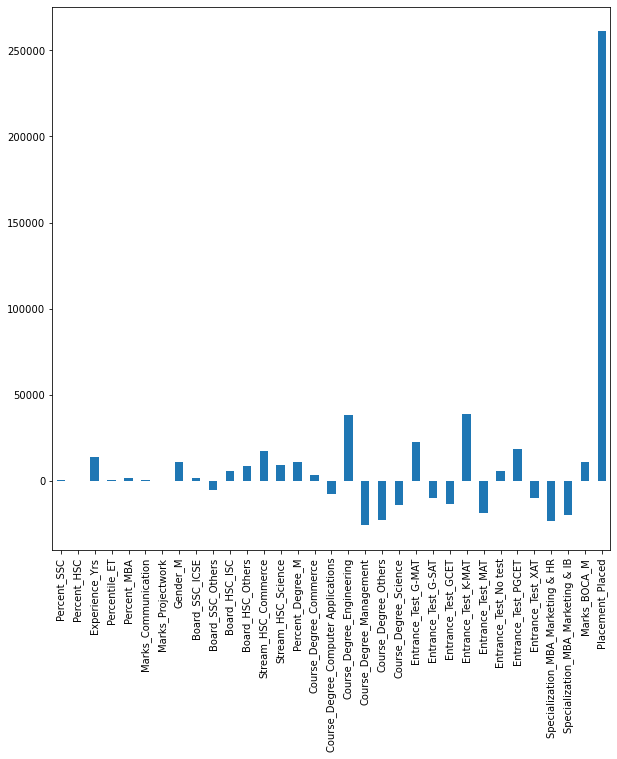

In [181]:
plt.figure(figsize=(10,10))
pd.Series(Ridge.coef_,x_train.columns).plot(kind='bar')

In [182]:
from sklearn.linear_model import Lasso

In [183]:
Lasso = Lasso(alpha=0.5)

In [184]:
Lasso.fit(x_train,y_train)


Lasso(alpha=0.5)

In [185]:
yL_pred=Lasso.predict(x_test)

In [186]:
yL_pred

array([319155.10995185, 292759.3811981 , 251492.09349133, 318015.00607588,
       -57736.81041168, 206368.73634343, 309883.83589996, 311484.75968743,
       256503.9164923 ,  -2088.6674305 , 234771.22360454, 217249.14010943,
       186909.30172587, 259029.58882503, 242295.33350227, 307897.94126445,
       337633.88133956, 277256.5986168 , 288071.72683664, 286504.90146914,
       216017.19150181, 272241.02611405, 282380.63336014, 270087.75592061,
        27959.25049503, 301504.03183549,   1143.98573357, 266681.98465504,
       224090.91088754, 276974.47375645, 300899.55829454, 291966.26361039,
       297398.06648326, 294469.44617709, 237881.25927009,  15537.61466102,
       216753.43371502, -73695.22205291, 248017.23960377, 214295.83433494,
       325423.71321453, 414497.44950405, 188409.25530713, 309373.58120092,
       246220.08094575, 308326.89944445,   8714.5516546 ,   7026.95412412,
       272321.77851084, 323141.46539865, 344087.30114165, 233163.41361736,
       219737.94953555, 2

In [187]:
Lasso.intercept_

-199497.03099740992

In [188]:
Lasso.coef_

array([ 3.52180994e+02, -2.62780622e+02,  1.35754924e+04,  4.11116031e+02,
        1.75584359e+03,  7.21369795e+02,  9.95688125e+01,  3.24181078e+04,
        3.36771771e+02, -5.73006957e+03,  7.29984280e+03,  9.37889850e+03,
        2.19477641e+04,  1.34873722e+04,  1.31757326e-03, -2.49496479e+03,
       -1.18128481e+04,  3.48616564e+04, -3.23771410e+04, -3.73839918e+04,
       -2.15486046e+04,  4.56000601e+04, -2.30272419e+04, -1.85316804e+04,
        4.35620100e+04, -1.62535421e+04,  7.09217188e+03,  2.67384579e+04,
       -1.89989734e+04, -2.50173213e+04, -2.53376753e+04,  9.05822076e-03,
        2.67781672e+05])

In [189]:
r2_score(y_test,yL_pred)

0.5585612828264269

In [190]:
mean_squared_error(y_test,yL_pred)

8340862090.6007805

In [191]:
np.sqrt(mean_squared_error(y_test,yL_pred))

91328.32030975266

In [192]:
mean_absolute_error(y_test,yL_pred)

57994.162366521596

Multicollinearity

In [199]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
final_data


,Percent_SSC,Percent_HSC,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Salary,Gender_M,Board_SSC_ICSE,...,Entrance_Test_GCET,Entrance_Test_K-MAT,Entrance_Test_MAT,Entrance_Test_No test,Entrance_Test_PGCET,Entrance_Test_XAT,Specialization_MBA_Marketing & HR,Specialization_MBA_Marketing & IB,Marks_BOCA_M,Placement_Placed
0,62.00,88.00,0,55.00,58.80,50,65,270000,1,0,...,0,0,1,0,0,0,1,0,1,1
1,76.33,75.33,1,86.50,66.28,69,70,200000,1,1,...,0,0,1,0,0,0,0,0,1,1
2,72.00,78.00,0,0.00,52.91,50,61,240000,1,0,...,0,0,0,1,0,0,0,0,1,1
3,60.00,63.00,0,75.00,57.80,54,66,250000,1,0,...,0,0,1,0,0,0,0,0,1,1
4,61.00,55.00,1,66.00,59.43,52,65,180000,1,0,...,0,0,1,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,62.60,50.60,0,34.53,58.63,62,57,162000,1,0,...,0,0,1,0,0,0,1,0,1,1
387,77.00,49.50,0,50.53,59.50,70,59,450000,1,0,...,0,0,1,0,0,0,0,0,1,1
388,66.40,72.00,0,60.00,61.63,73,73,240000,1,0,...,0,0,1,0,0,0,0,1,1,1
389,70.00,77.00,0,77.00,70.17,67,77,300000,0,1,...,0,0,1,0,0,0,0,0,0,1


In [201]:
vif_data= pd.DataFrame()

In [203]:
vif_data['Features']=final_data.columns

In [204]:
vif_data

,Features
0,Percent_SSC
1,Percent_HSC
2,Experience_Yrs
3,Percentile_ET
4,Percent_MBA
5,Marks_Communication
6,Marks_Projectwork
7,Salary
8,Gender_M
9,Board_SSC_ICSE


In [206]:
vif_data['VIF']=[vif(final_data.values,i) for i in range(len(final_data.columns))]

In [207]:
vif_data

,Features,VIF
0,Percent_SSC,69.141148
1,Percent_HSC,56.321922
2,Experience_Yrs,1.802230
3,Percentile_ET,18.577228
4,Percent_MBA,260.106856
5,Marks_Communication,110.063435
6,Marks_Projectwork,104.609717
7,Salary,11.787809
8,Gender_M,inf
9,Board_SSC_ICSE,3.182146


In [220]:
final_data.drop(columns=['Percent_SSC','Percent_HSC','Percent_MBA','Marks_Communication','Marks_Projectwork','Gender_M','Percent_Degree_M','Marks_BOCA_M'],axis=1,inplace=True)

In [236]:
final_data

,Experience_Yrs,Percentile_ET,Salary,Board_SSC_ICSE,Board_SSC_Others,Board_HSC_ISC,Board_HSC_Others,Stream_HSC_Commerce,Stream_HSC_Science,Course_Degree_Commerce,...,Entrance_Test_G-SAT,Entrance_Test_GCET,Entrance_Test_K-MAT,Entrance_Test_MAT,Entrance_Test_No test,Entrance_Test_PGCET,Entrance_Test_XAT,Specialization_MBA_Marketing & HR,Specialization_MBA_Marketing & IB,Placement_Placed
0,0,55.00,270000,0,1,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,1
1,1,86.50,200000,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0.00,240000,0,1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,75.00,250000,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1,66.00,180000,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,0,34.53,162000,0,1,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,1
387,0,50.53,450000,0,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
388,0,60.00,240000,0,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,1
389,0,77.00,300000,1,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1


In [237]:
X1=final_data.drop('Salary',axis=1)
y1=final_data['Salary']

In [238]:
X1.shape

(391, 25)

In [239]:
y1.shape

(391,)

In [240]:
x1_train,x1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.3,random_state=123)

In [241]:
x1_train.shape

(273, 25)

In [242]:
x1_test.shape

(118, 25)

In [243]:
y1_train.shape

(273,)

In [244]:
y1_test.shape

(118,)

In [231]:
Lr1= LinearRegression()

In [245]:
Lr1.fit(x1_train,y1_train)

LinearRegression()

In [246]:
y1_pred=Lr1.predict(x1_test)

In [247]:
y1_pred

array([292427.91868815, 299537.05682845, 258756.84248635, 306953.60811996,
       -50057.04522751, 220000.54997976, 317792.13618816, 334091.98907965,
       276941.06744837,  18149.88137069, 241756.1974255 , 247160.86535585,
       207238.18508695, 265609.38601994, 240851.95016231, 315824.80304494,
       331557.71424369, 250852.74651952, 294340.48812313, 296331.12107773,
       252530.92577224, 262408.87592136, 290402.41552865, 266587.86279782,
        46357.95207904, 289361.86527885,  -2427.89307345, 272442.93155416,
       213885.70322447, 295565.83665225, 269062.91137042, 263087.77091709,
       308626.747692  , 278257.25921344, 241841.98730962,    416.7476845 ,
       220329.23297846, -42694.97682906, 266939.67836921, 222641.78531141,
       346815.3874151 , 389736.67264713, 215386.847707  , 277324.05980807,
       249660.73502948, 272183.74932201, -18541.35753397, -15117.58432993,
       286332.98457162, 335837.24828349, 335147.35492353, 239768.34348445,
       251814.97223307, 2

In [248]:
Lr1.intercept_

-47055.107336664834

In [249]:
Lr1.coef_

array([ 18210.1648509 ,    633.56870899,   9728.0353817 ,   -319.13713449,
        -1675.81100979,   7467.11424321,  26465.78796664,  22727.530644  ,
        14826.12412485,   7808.86009388,  56540.60131486, -13652.85578636,
       -29732.86829284,  -2010.50249689,  55006.8079391 , -12665.86914925,
       -32027.95640666,  34324.06956574, -25403.94011261,   7648.5932505 ,
        30340.22820695, -36777.38249629, -28210.96120811, -24282.38542813,
       270298.35131668])

In [250]:
r2_score(y1_test,y1_pred)

0.5378783766860764

In [251]:
mean_squared_error(y1_test,y1_pred)

8731659863.967976

In [252]:
np.sqrt(mean_squared_error(y1_test,y1_pred))

93443.35109555937

In [253]:
mean_absolute_error(y1_test,y1_pred)

58802.95908538237

In [254]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [257]:
X1 = final_data.drop('Salary', axis = 1)

# dependent variable
y1 = final_data['Salary']

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.20, random_state = 10)

# initiate linear regression model to use in feature selection
linreg = LinearRegression()

In [259]:
linreg_forward = sfs(estimator = linreg, k_features = 5, forward = True, verbose = 2, scoring = 'r2')

# fit the forward selection on training data using fit()
sfs_forward = linreg_forward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished

[2021-05-03 12:05:15] Features: 1/5 -- score: 0.6923233600513529[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.1s finished

[2021-05-03 12:05:15] Features: 2/5 -- score: 0.7004941653119885[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.1s finished

[2021-05-03 12:05:15] Features: 3/5 -- score: 0.7088071317738193[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [260]:
# print the selected feature names when k_features = 5
print('Features selelected using forward selection are: \n',sfs_forward.k_feature_names_)

# print the R-squared value
print('\nR-squared: ', sfs_forward.k_score_)

Features selelected using forward selection are: 
 ('Percentile_ET', 'Course_Degree_Engineering', 'Entrance_Test_MAT', 'Specialization_MBA_Marketing & HR', 'Placement_Placed')

R-squared:  0.729119619163628


In [274]:
X2=final_data[['Percentile_ET', 'Course_Degree_Engineering', 'Entrance_Test_MAT', 'Specialization_MBA_Marketing & HR', 'Placement_Placed']]
y2=final_data['Salary']

In [275]:
X2.shape

(391, 5)

In [276]:
y2.shape

(391,)

In [277]:
x2_train,x2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.3,random_state=123)

In [278]:
x2_train.shape

(273, 5)

In [279]:
x2_test.shape

(118, 5)

In [280]:
y2_train.shape

(273,)

In [281]:
y2_test.shape

(118,)

In [282]:
Lr2= LinearRegression()

In [283]:
Lr2.fit(x2_train,y2_train)

LinearRegression()

In [285]:
y2_pred=Lr2.predict(x2_test)

In [287]:
y2_pred

array([292491.22806303, 273372.41256014, 270352.35952999, 286541.85860907,
       -37077.02912643, 232237.3908811 , 314374.72265714, 294110.50576362,
       275945.75259269,  25757.30394472, 243295.02155842, 243295.02155842,
       243295.02155842, 266863.37600723, 243295.02155842, 294042.38793923,
       291083.0469018 , 270352.35952999, 268377.10543814, 282757.53503179,
       277459.4820236 , 260241.38535296, 259484.5206375 , 262511.97949932,
          750.33093059, 274432.02316178, -26307.00704098, 266106.51129177,
       243295.02155842, 294110.50576362, 270352.35952999, 243044.84341184,
       330144.67205098, 267810.03250751, 222965.22251081,  10128.04757057,
       226182.47315746, -28282.26113283, 272918.29373087, 243295.02155842,
       333863.41347416, 367816.77739997, 235264.84974292, 260051.59356813,
       242833.49689748, 270352.35952999,    750.33093059,  -1981.78787672,
       282000.67031634, 328270.02041146, 323332.88961188, 278216.34673906,
       282000.67031634, 2

In [288]:
Lr2.intercept_

750.3309305908333

In [289]:
Lr2.coef_

array([   756.86471546,  57917.66088146, -47387.13701919, -27057.33797157,
       269602.0285994 ])

In [290]:
r2_score(y2_test,y2_pred)

0.5685292909484863

In [291]:
mean_squared_error(y2_test,y2_pred)

8152519342.605266

In [292]:
np.sqrt(mean_squared_error(y2_test,y2_pred))

90291.30269635755

In [293]:
mean_absolute_error(y2_test,y2_pred)

53791.43948071377

### Using Backward Selection Technique

In [296]:
# initiate linear regression model to use in feature selection
linreg = LinearRegression()

linreg_backward = sfs(estimator = linreg, k_features = 'best', forward = False, verbose = 2, scoring = 'r2')

# fit the backward elimination on training data using fit()
sfs_backward = linreg_backward.fit(x1_train, y1_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.4s finished

[2021-05-03 12:15:26] Features: 24/1 -- score: 0.6841363641204647[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.2s finished

[2021-05-03 12:15:27] Features: 23/1 -- score: 0.6882398266678662[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.2s finished

[2021-05-03 12:15:27] Features: 22/1 -- score: 0.6917292790570495[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [297]:
# print the selected feature names when k_features = 5 
print('Features selelected using backward elimination are: \n', sfs_backward.k_feature_names_)

# print the R-squared value
print('\nR-squared: ', sfs_backward.k_score_)

Features selelected using backward elimination are: 
 ('Experience_Yrs', 'Percentile_ET', 'Board_SSC_ICSE', 'Stream_HSC_Commerce', 'Stream_HSC_Science', 'Course_Degree_Engineering', 'Course_Degree_Management', 'Entrance_Test_G-MAT', 'Entrance_Test_MAT', 'Specialization_MBA_Marketing & HR', 'Placement_Placed')

R-squared:  0.7019318758515357


In [298]:
X3=final_data[['Experience_Yrs', 'Percentile_ET', 'Board_SSC_ICSE', 'Stream_HSC_Commerce', 'Stream_HSC_Science', 'Course_Degree_Engineering', 'Course_Degree_Management', 'Entrance_Test_G-MAT', 'Entrance_Test_MAT', 'Specialization_MBA_Marketing & HR', 'Placement_Placed']]
y3=final_data['Salary']

In [299]:
X3.shape

(391, 11)

In [300]:
y3.shape

(391,)

In [301]:
x3_train,x3_test,y3_train,y3_test=train_test_split(X3,y3,test_size=0.3,random_state=123)

In [302]:
x3_train.shape

(273, 11)

In [303]:
x3_test.shape

(118, 11)

In [304]:
y3_train.shape

(273,)

In [305]:
y3_test.shape

(118,)

In [306]:
Lr3= LinearRegression()

In [307]:
Lr3.fit(x3_train,y3_train)

LinearRegression()

In [308]:
y3_pred=Lr3.predict(x3_test)

In [309]:
y3_pred

array([306982.5979977 , 297054.8009858 , 263982.20619762, 301879.8968662 ,
       -49471.86281719, 218223.74794401, 322905.69589357, 326487.72204971,
       269686.36562731,  19803.97900998, 253072.03271578, 244683.15235779,
       211520.22413011, 268962.15892434, 244447.32710772, 308028.36957204,
       323450.02636272, 250809.49022117, 282276.30438562, 288080.65329075,
       252814.20914609, 277886.15334979, 294140.31539409, 315569.01540578,
        49793.60896162, 279726.99015153,  16651.56116548, 268202.73500259,
       257620.04308418, 296301.42010721, 269200.49454588, 248233.68011671,
       320806.10400587, 275478.26860054, 236710.86908083,   2522.66709939,
       219173.85425157, -40647.3568465 , 266648.66994032, 226056.32278301,
       340064.62411426, 373266.01035039, 221261.44363099, 265297.93563835,
       255871.39278122, 272371.08655561,  -8549.99602224, -16653.61333009,
       292775.34296732, 331189.87267485, 352546.47101063, 261962.51342583,
       251223.53438165, 2

In [310]:
Lr3.intercept_

-28540.208273467957

In [311]:
Lr3.coef_

array([ 18391.00432471,    759.42392175,   8624.70560806,  32927.10297762,
        24538.22261963,  48816.66215251, -21561.59633444,  43943.67721699,
       -44284.92308284, -24753.16743816, 267984.19185146])

In [312]:
r2_score(y3_test,y3_pred)

0.5568102567040918

In [313]:
mean_squared_error(y3_test,y3_pred)

8373947243.386991

In [314]:
np.sqrt(mean_squared_error(y3_test,y3_pred))

91509.27408403473

In [315]:
mean_absolute_error(y3_test,y3_pred)

56583.123373885304